In [ ]:
!pip install skl2onnx
!pip install onnxruntime onnx graphviz pydot

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.4/298.4 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 88.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 52.1 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.5
    Uninstalling protobuf-4.25.5:
      Successfully uninstalled protobuf-4.25.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-status 1.62.3 requires protobuf>=4.21.6, but you have protobuf 3.20.2 which is incompatible.
tensorflow 2.17.1 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 3.20.2 which is incompatible.
tensorflow-metadata 1.13.1 requires protobuf<5,>=3.20.3, but you have protobuf 3.20.2 w

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 57.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 811.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 6.0 MB/s eta 0:00:00


In [ ]:
import os

import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [21]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_public.csv.gz', compression='gzip')

In [51]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from scipy.stats import zscore

from sklearn.tree import DecisionTreeClassifier

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


from skl2onnx.common.data_types import FloatTensorType
from skl2onnx import convert_sklearn

import onnxruntime as rt

from onnx.tools.net_drawer import GetPydotGraph, GetOpNodeProducer

import graphviz

In [23]:
print(df.columns.tolist())

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'Class']


In [24]:
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)


Missing values in each column:
A        0
B        0
C        0
D        0
E        0
F        0
G        0
H        0
I        0
J        0
K        0
L        0
M        0
N        0
O        0
Class    0
dtype: int64


In [25]:
# Check initial shape
print("Initial shape:", df.shape)

# Check for duplicate records
duplicates = df.duplicated().sum()
print("Number of duplicate records:", duplicates)

Initial shape: (1200000, 16)
Number of duplicate records: 0


In [31]:
 # Separate features and target
X = df.drop('Class', axis=1)  # Features
y = df['Class']  # Target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (960000, 15)
X_test shape: (240000, 15)
y_train shape: (960000,)
y_test shape: (240000,)


# **Data Cleaning And Visualization**

<ipython-input-80-e136bae65f66>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, palette='viridis')


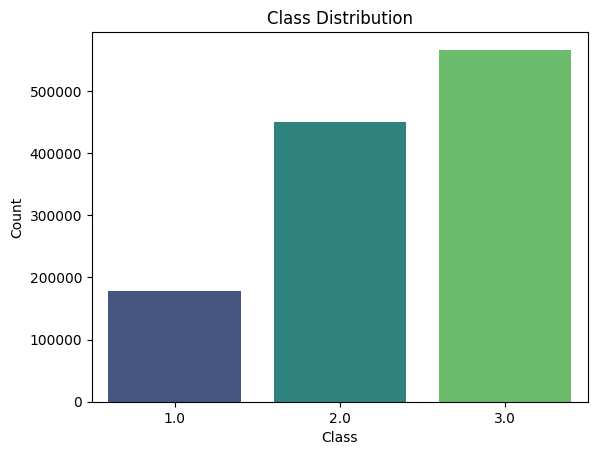

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot for the Class column
sns.countplot(x='Class', data=df, palette='viridis')
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

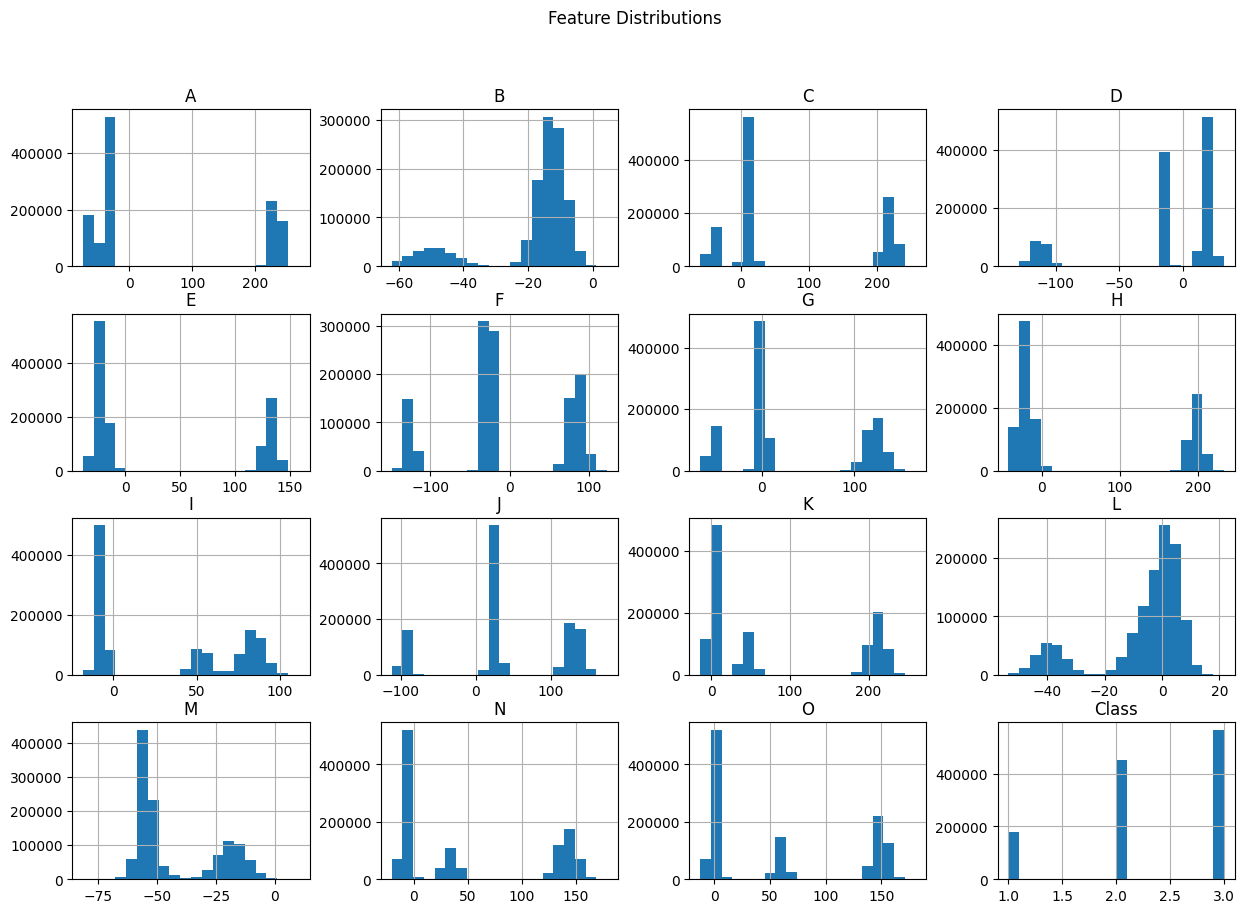

<ipython-input-81-68ebef2a57b3>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], palette='viridis')


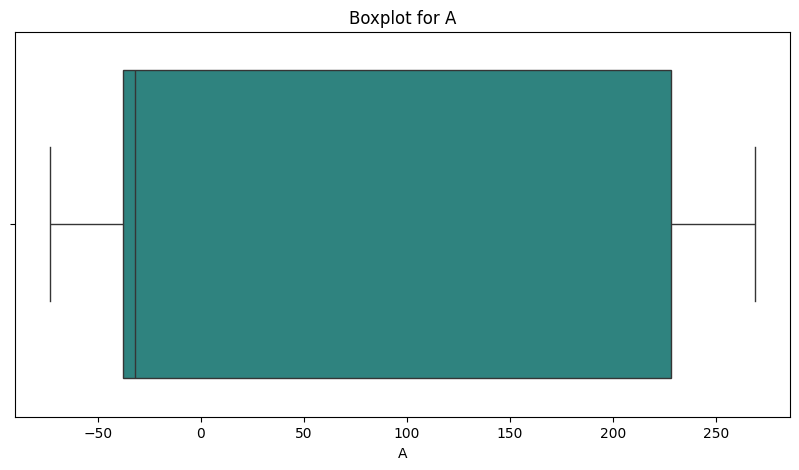

<ipython-input-81-68ebef2a57b3>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], palette='viridis')


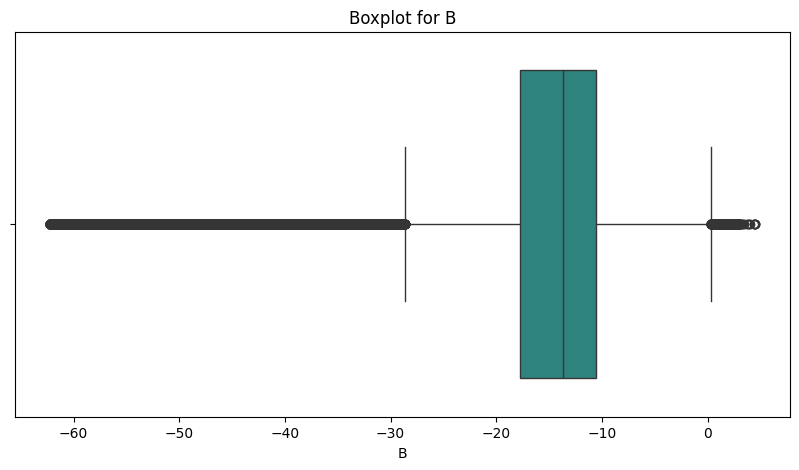

<ipython-input-81-68ebef2a57b3>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], palette='viridis')


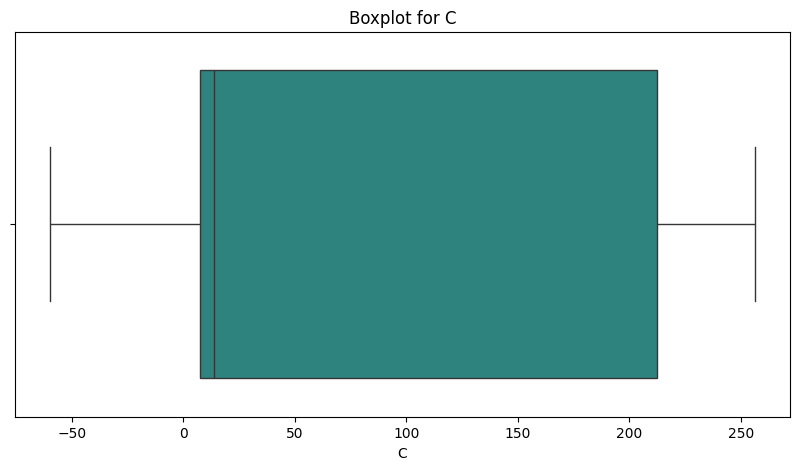

<ipython-input-81-68ebef2a57b3>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], palette='viridis')


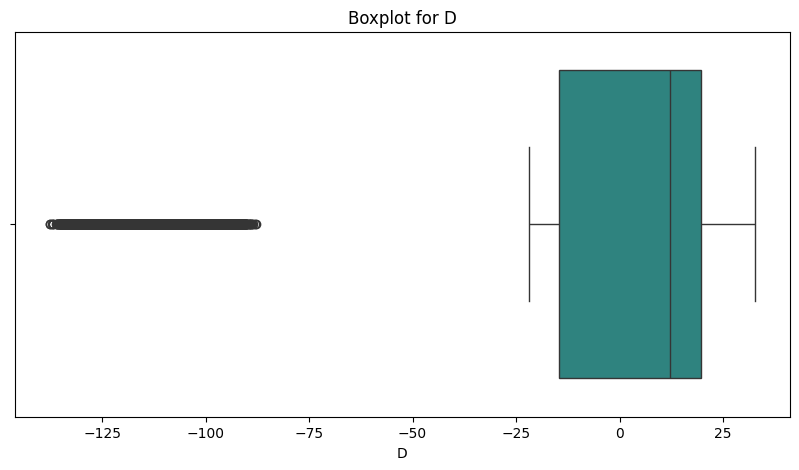

<ipython-input-81-68ebef2a57b3>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], palette='viridis')


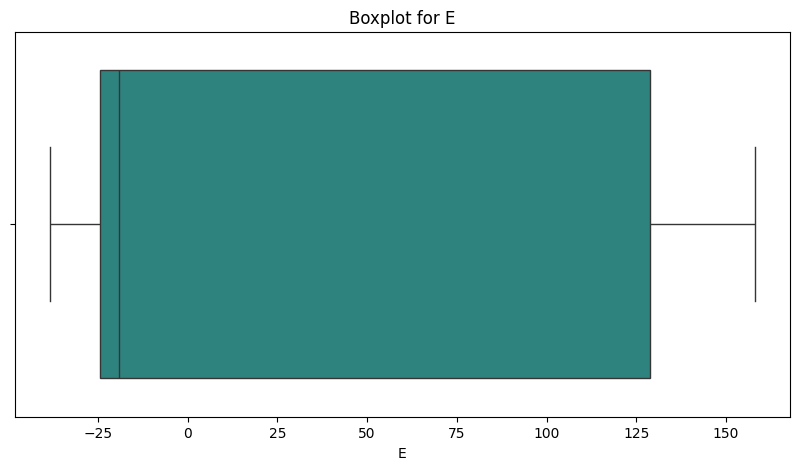

<ipython-input-81-68ebef2a57b3>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], palette='viridis')


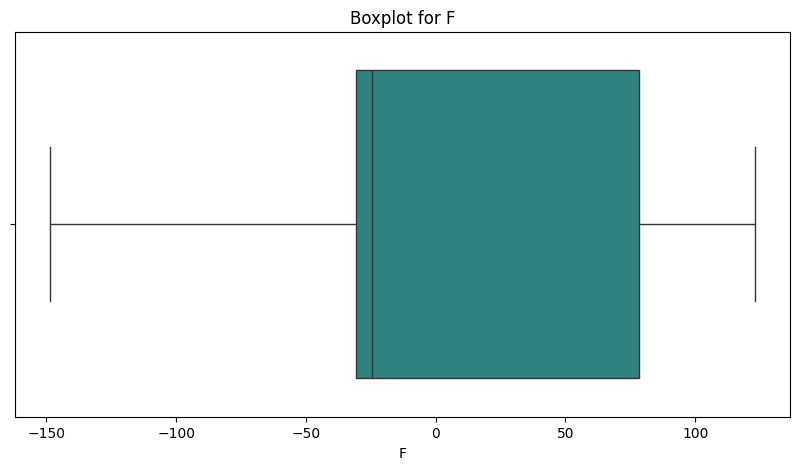

<ipython-input-81-68ebef2a57b3>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], palette='viridis')


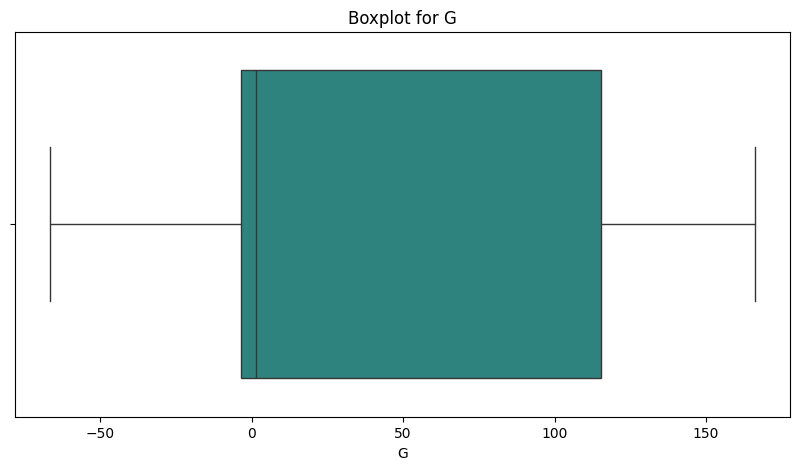

<ipython-input-81-68ebef2a57b3>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], palette='viridis')


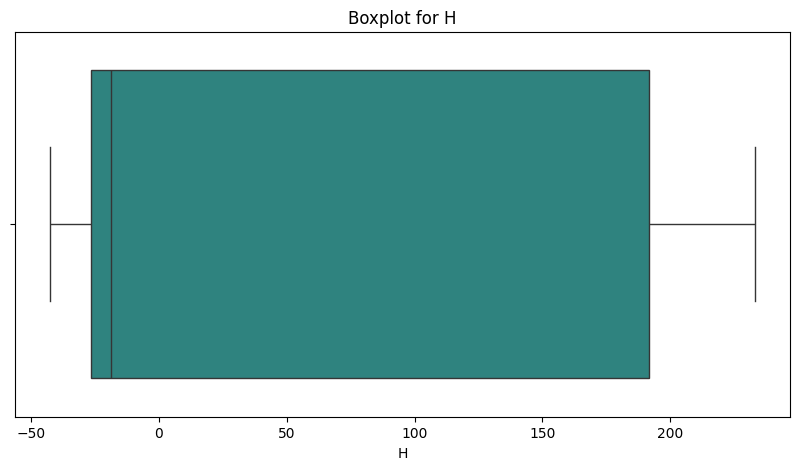

<ipython-input-81-68ebef2a57b3>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], palette='viridis')


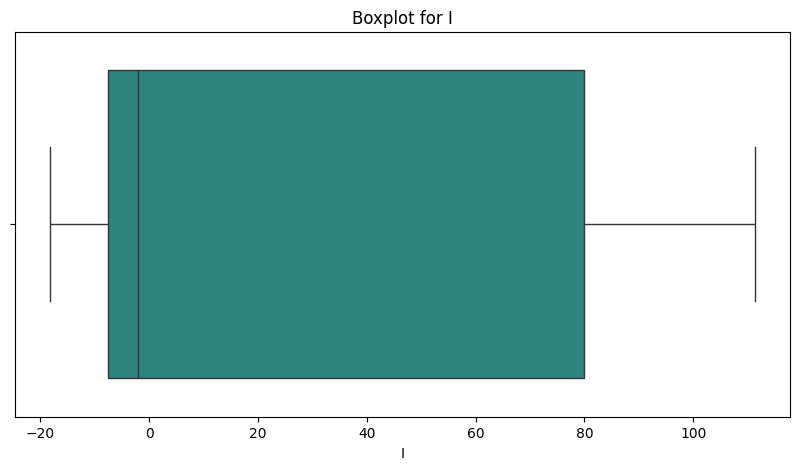

<ipython-input-81-68ebef2a57b3>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], palette='viridis')


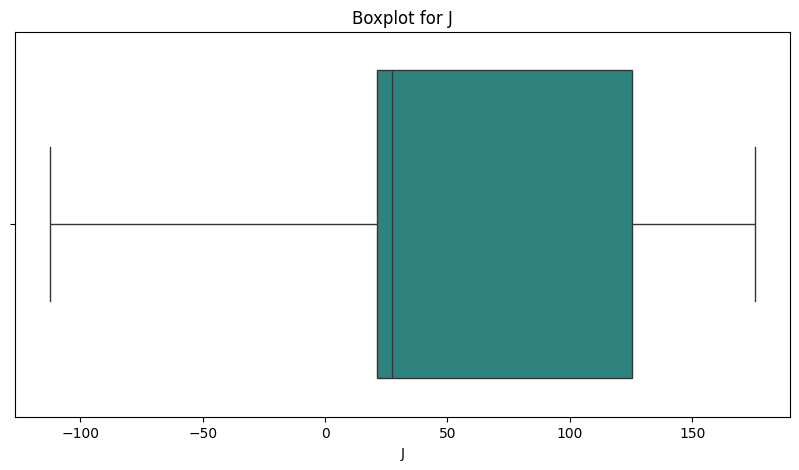

<ipython-input-81-68ebef2a57b3>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], palette='viridis')


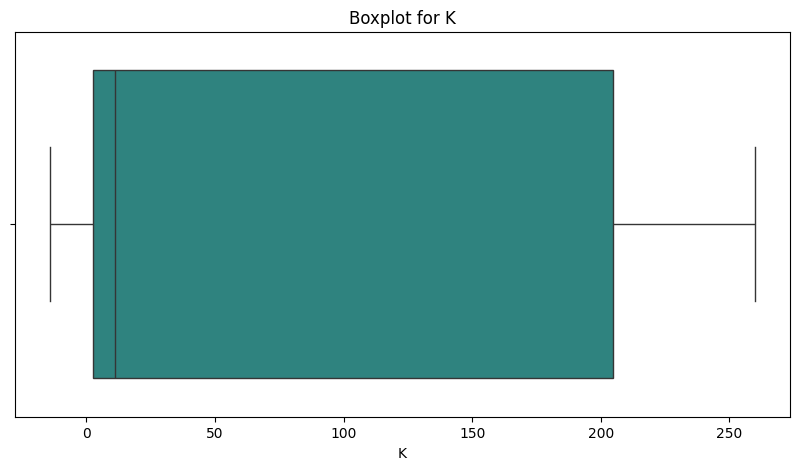

<ipython-input-81-68ebef2a57b3>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], palette='viridis')


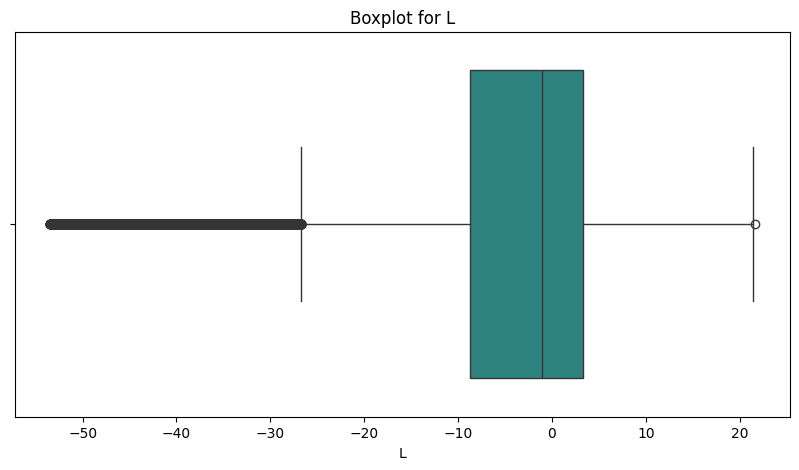

<ipython-input-81-68ebef2a57b3>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], palette='viridis')


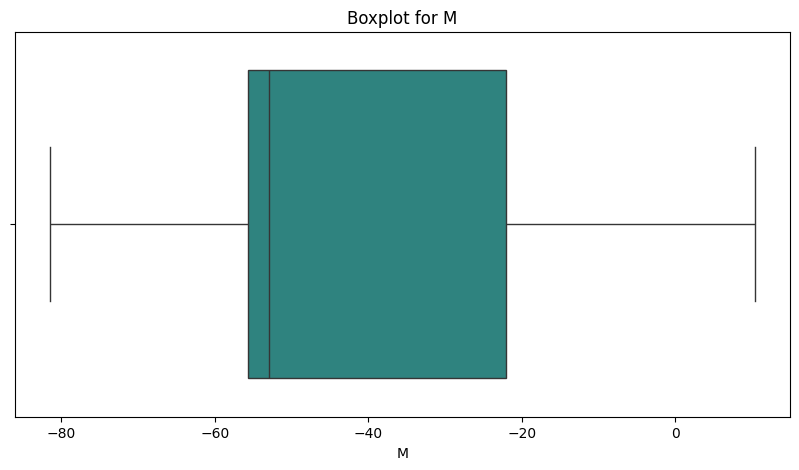

<ipython-input-81-68ebef2a57b3>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], palette='viridis')


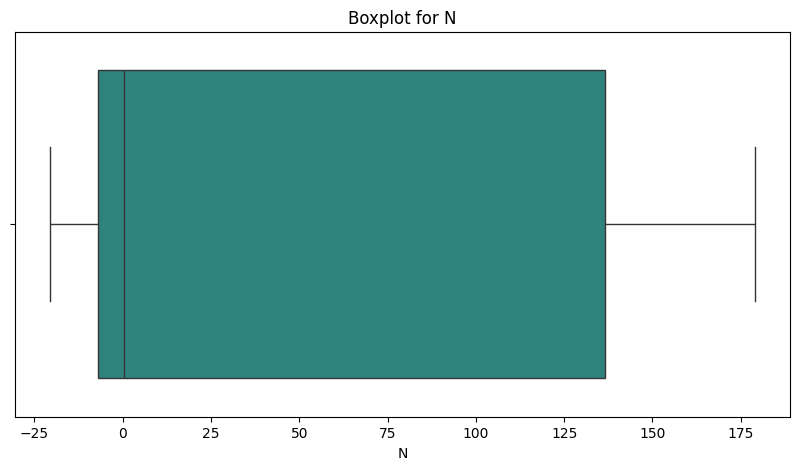

<ipython-input-81-68ebef2a57b3>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], palette='viridis')


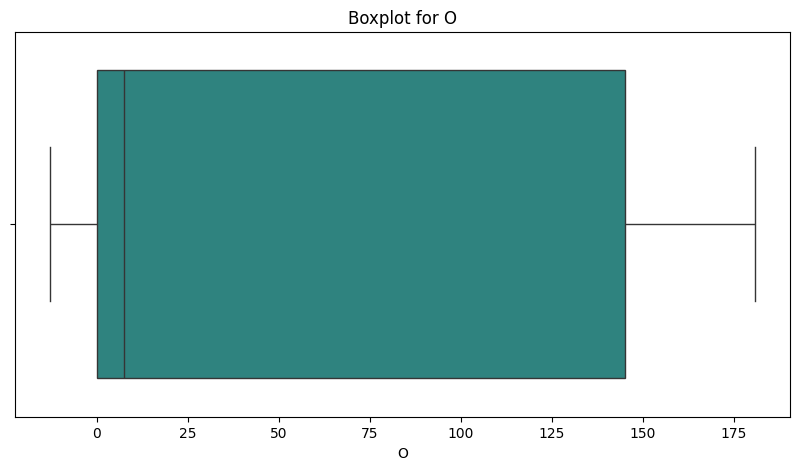

In [81]:
# Histograms for numerical columns
df.hist(figsize=(15, 10), bins=20)
plt.suptitle("Feature Distributions")
plt.show()

# Boxplots for numerical features
for column in df.columns[:-1]:  # Exclude 'Class'
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[column], palette='viridis')
    plt.title(f"Boxplot for {column}")
    plt.show()

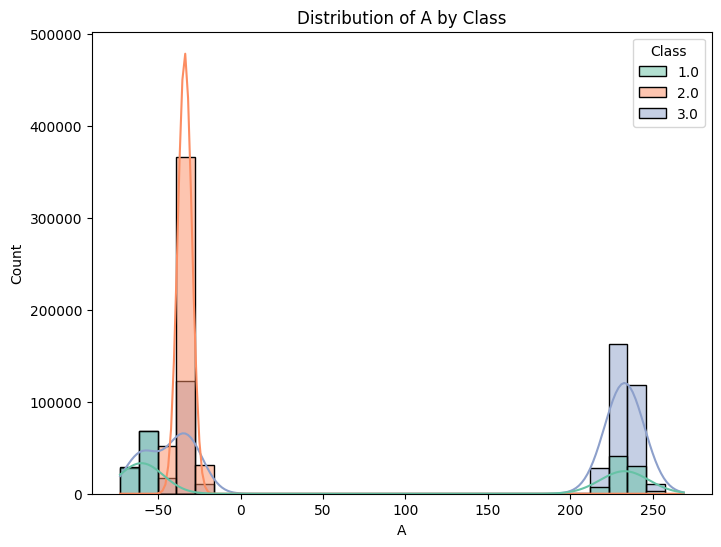

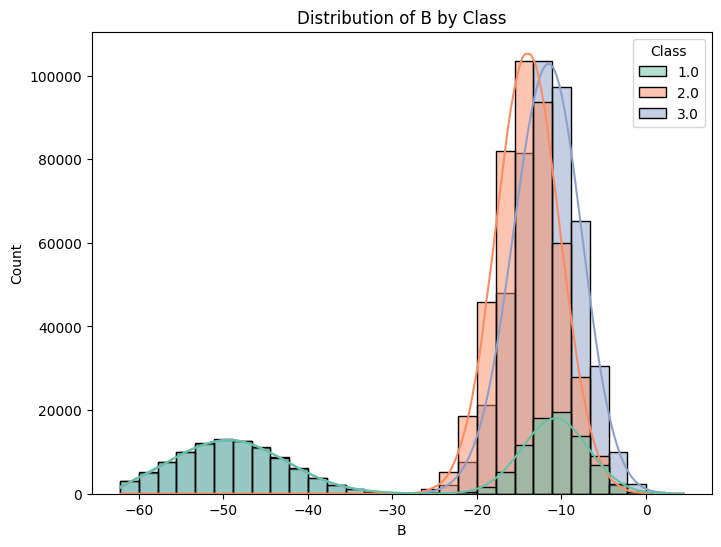

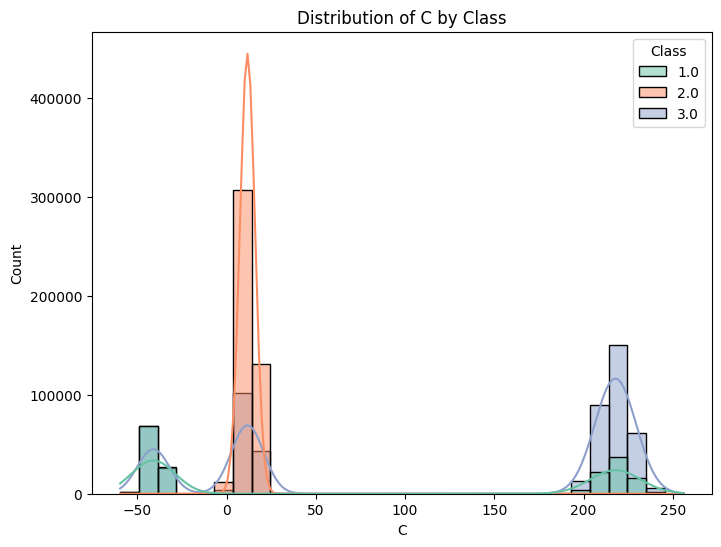

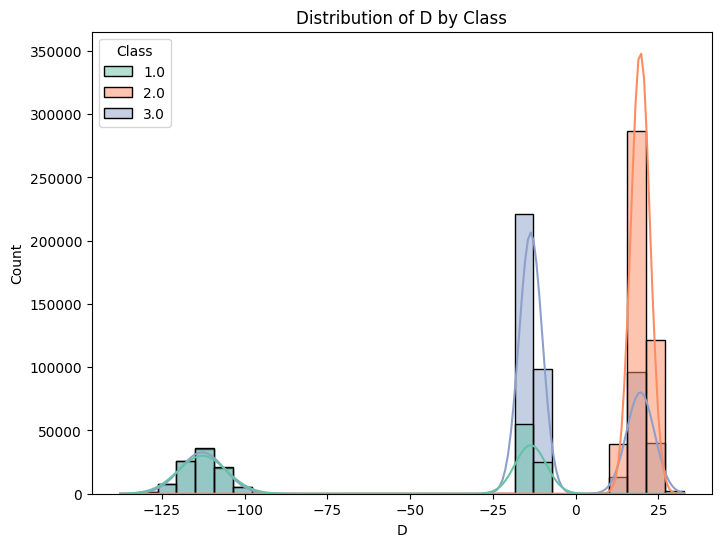

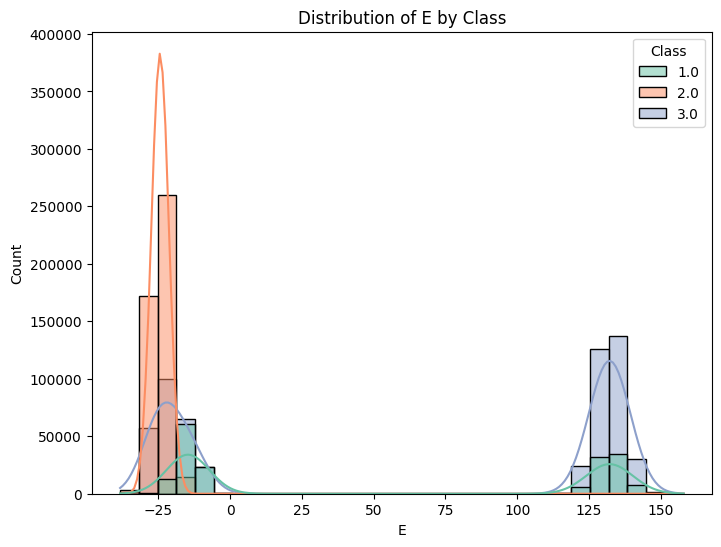

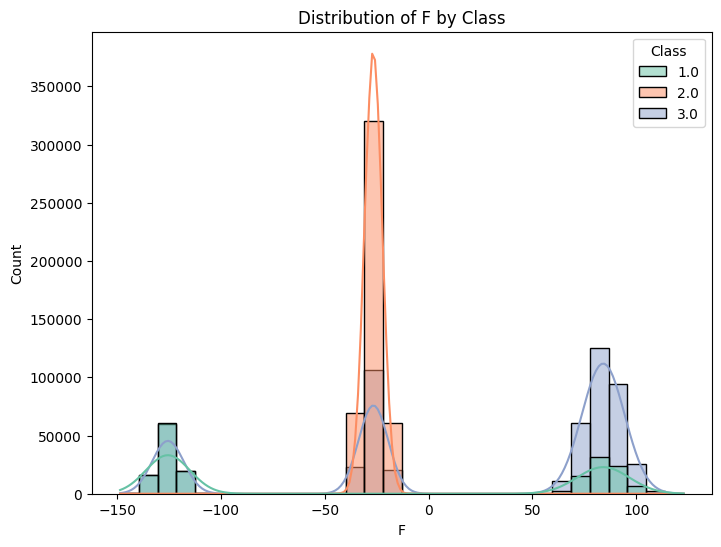

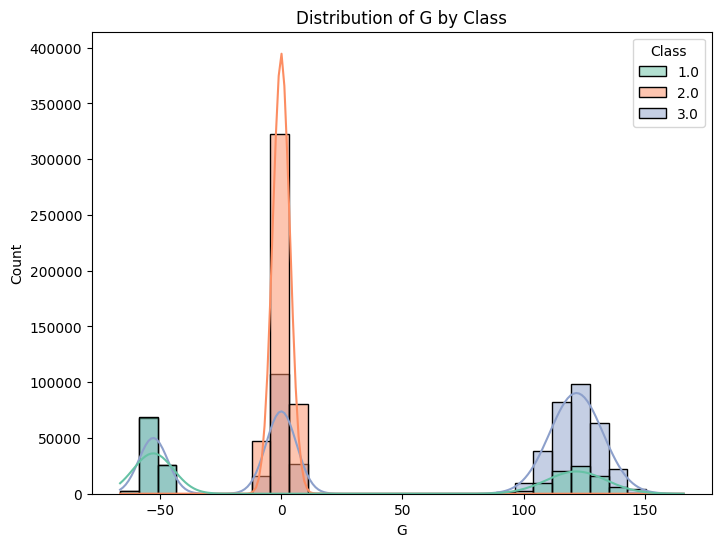

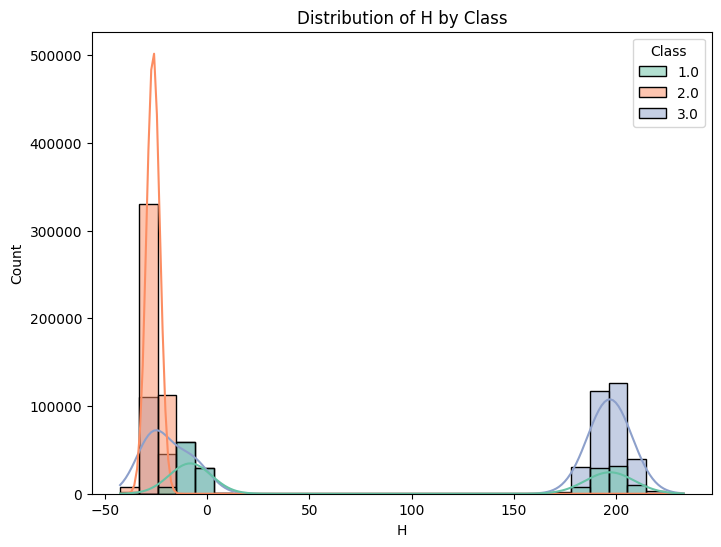

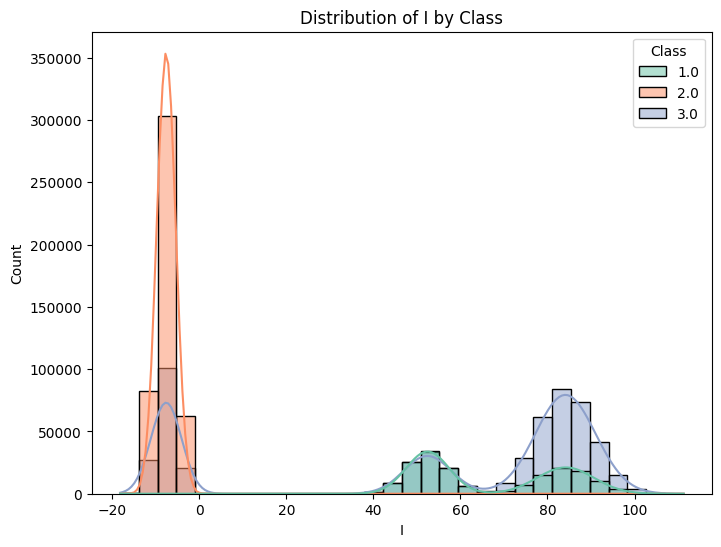

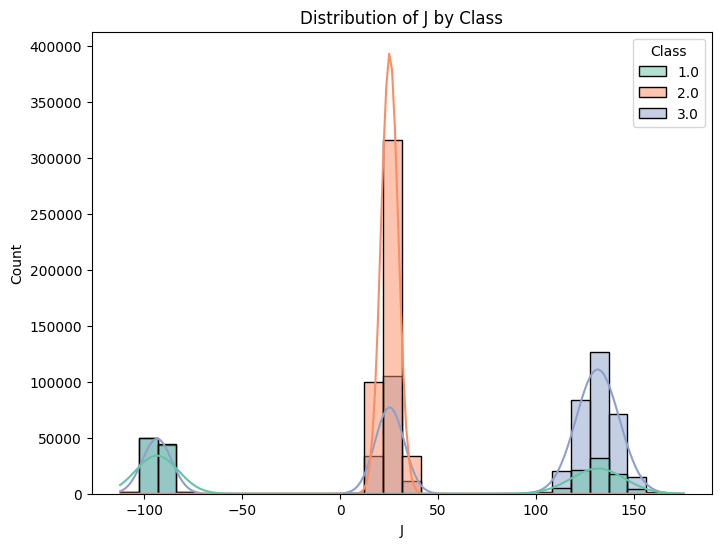

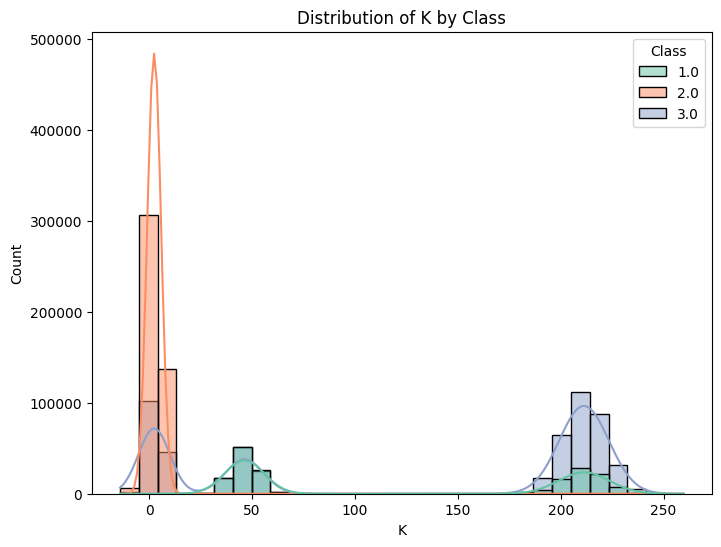

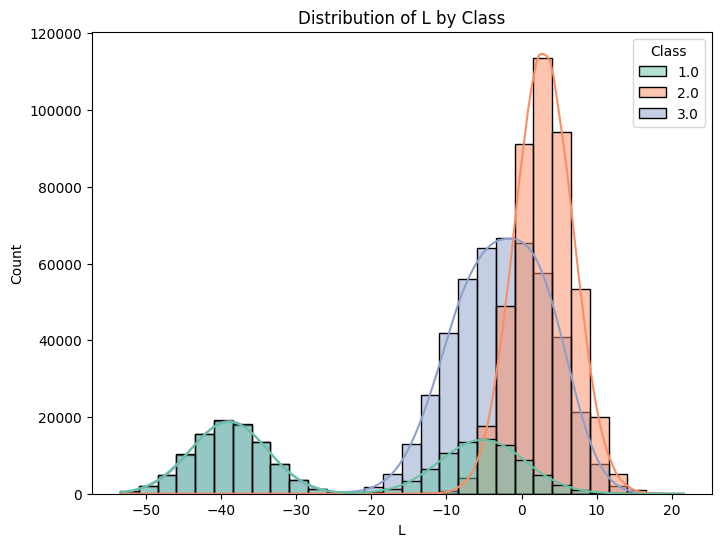

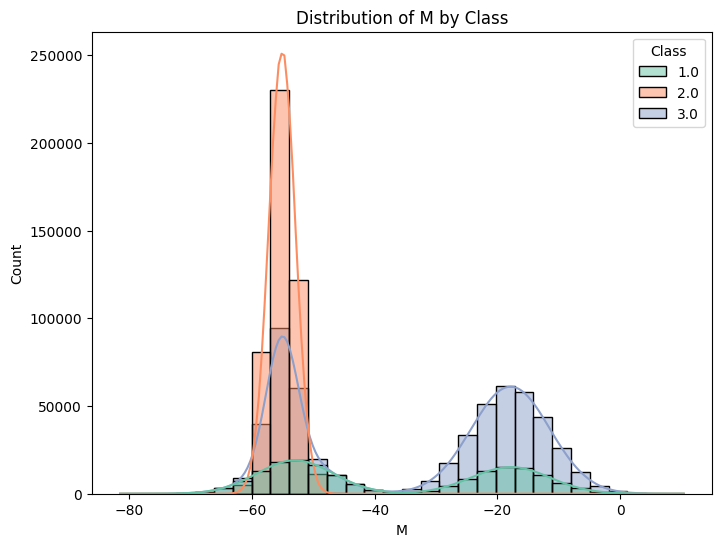

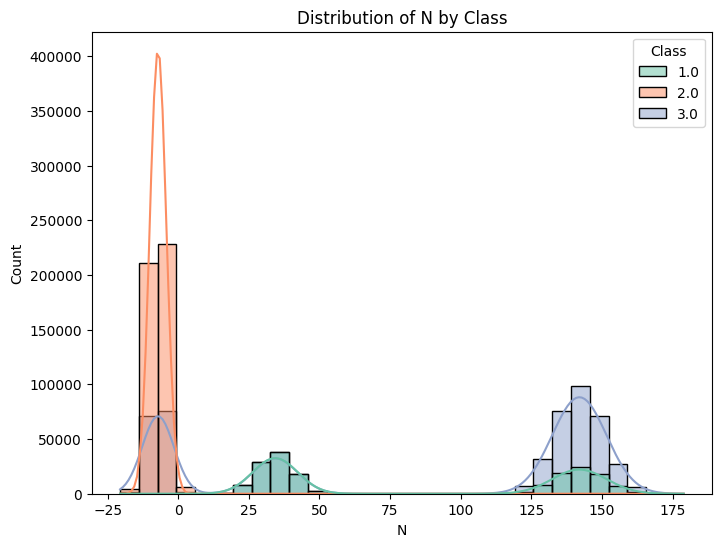

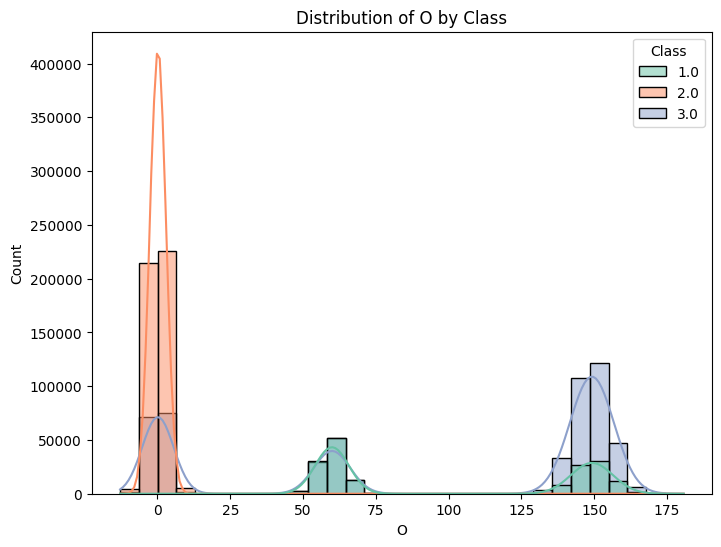

In [85]:
features = df.columns[:-1] # All columns except 'Class'
for feature in features:
  plt.figure(figsize=(8, 6))
  sns.histplot(data=df, x=feature, hue='Class', kde=True, palette='Set2',bins=30)
  plt.title(f"Distribution of {feature} by Class")
  plt.show()

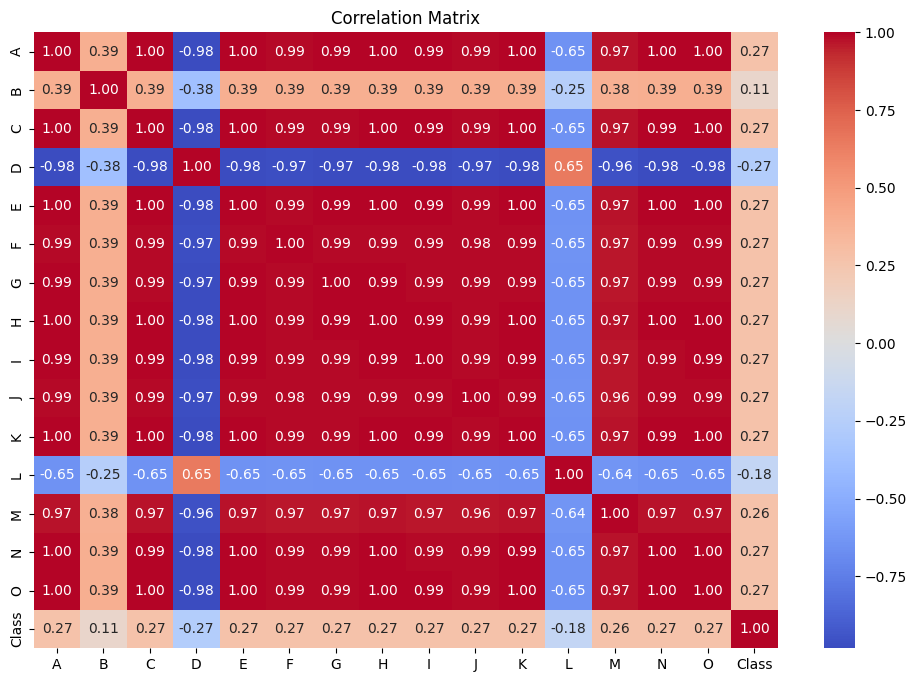

In [35]:
# Compute correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [53]:
## Handle missing values
num_imputer = SimpleImputer(strategy='mean')
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

df[num_cols] = num_imputer.fit_transform(df[num_cols])

## Remove duplicates
df = df.drop_duplicates()

In [54]:
# Additional data quality checks
def data_quality_report(df):
    print("\nData Quality Report:")
    print("-" * 50)

    # Value ranges
    print("\nValue Ranges for each column:")
    for col in df.columns:
        print(f"{col}: {df[col].min():.2f} to {df[col].max():.2f}")
    # Check for extreme values
    print("\nColumns with potential extreme values:")
    for col in numerical_cols:
        mean = df[col].mean()
        std = df[col].std()
        extremes = df[abs(df[col] - mean) > 3 * std][col].count()
        if extremes > 0:
            print(f"{col}: {extremes} extreme values")

In [55]:
# Define numerical columns (excluding 'Class')
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'Class' in numerical_cols:
    numerical_cols.remove('Class')

def handle_inconsistent_data(df):
    print("Starting data cleaning process...")
    df_clean = df.copy()

    # 1. Handle Class column
    df_clean['Class'] = df_clean['Class'].clip(1, 3)

    # 2. Handle numerical columns
    for col in numerical_cols:
        # Calculate statistics
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Replace outliers with bounds
        df_clean[col] = df_clean[col].clip(lower=lower_bound, upper=upper_bound)

    return df_clean

def data_quality_report(df):
    print("\nData Quality Report:")
    print("-" * 50)

    # Value ranges
    print("\nValue Ranges for each column:")
    for col in df.columns:
        print(f"{col}: {df[col].min():.2f} to {df[col].max():.2f}")

    # Check for extreme values
    print("\nColumns with potential extreme values:")
    for col in numerical_cols:
        mean = df[col].mean()
        std = df[col].std()
        extremes = df[abs(df[col] - mean) > 3 * std][col].count()
        if extremes > 0:
            print(f"{col}: {extremes} extreme values")

# Execute the cleaning and reporting
print("Original dataset shape:", df.shape)

# Clean the data
cleaned_df = handle_inconsistent_data(df)

# Generate reports for before and after cleaning
print("\nBefore Cleaning:")
data_quality_report(df)

print("\nAfter Cleaning:")
data_quality_report(cleaned_df)

# Show class distribution
print("\nClass Distribution After Cleaning:")
print(cleaned_df['Class'].value_counts().sort_index())

Original dataset shape: (1193716, 16)
Starting data cleaning process...

Before Cleaning:

Data Quality Report:
--------------------------------------------------

Value Ranges for each column:
A: -73.09 to 268.77
B: -62.22 to 4.46
C: -59.73 to 256.17
D: -137.58 to 32.64
E: -38.30 to 157.98
F: -148.59 to 122.92
G: -66.54 to 166.05
H: -42.46 to 232.95
I: -18.19 to 111.30
J: -112.38 to 175.54
K: -14.15 to 259.80
L: -53.47 to 21.59
M: -81.45 to 10.33
N: -20.58 to 178.93
O: -12.83 to 180.70
Class: 1.00 to 3.00

Columns with potential extreme values:
B: 2988 extreme values
L: 168 extreme values

After Cleaning:

Data Quality Report:
--------------------------------------------------

Value Ranges for each column:
A: -73.09 to 268.77
B: -28.59 to 0.29
C: -59.73 to 256.17
D: -65.99 to 32.64
E: -38.30 to 157.98
F: -148.59 to 122.92
G: -66.54 to 166.05
H: -42.46 to 232.95
I: -18.19 to 111.30
J: -112.38 to 175.54
K: -14.15 to 259.80
L: -26.75 to 21.42
M: -81.45 to 10.33
N: -20.58 to 178.93
O: -1

# **Summary Statistics**

In [59]:
def remove_irrelevant_data(df):
    df_clean = df.copy()

    # 1. Check for relevant columns
    # Keep only columns A through O and Class as shown in the image
    relevant_columns = [chr(i) for i in range(ord('A'), ord('O')+1)] + ['Class']
    df_clean = df_clean[relevant_columns]

    # 2. Remove rows with invalid Class values
    df_clean = df_clean[df_clean['Class'].isin([1, 2, 3])]

    # 3. Remove rows with unrealistic values
    for col in df_clean.columns:
        if col != 'Class':
            # Calculate statistics
            Q1 = df_clean[col].quantile(0.25)
            Q3 = df_clean[col].quantile(0.75)
            IQR = Q3 - Q1

            # Define bounds
            lower_bound = Q1 - 3 * IQR  # Using 3 instead of 1.5 to be less aggressive
            upper_bound = Q3 + 3 * IQR

            # Create mask for relevant data
            mask = (df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)
            df_clean = df_clean[mask]

    return df_clean

# Execute the cleaning
print("Original shape:", df.shape)

# Remove irrelevant data
cleaned_df = remove_irrelevant_data(df)
print("Shape after removing irrelevant data:", cleaned_df.shape)

# Display summary statistics
print("\nSummary statistics of cleaned data:")
print(cleaned_df.describe())

# Show class distribution
print("\nClass distribution after cleaning:")
print(cleaned_df['Class'].value_counts().sort_index())

# Check remaining data ranges
print("\nValue ranges for each column:")
for col in cleaned_df.columns:
    print(f"{col}: {cleaned_df[col].min():.2f} to {cleaned_df[col].max():.2f}")

Original shape: (1193716, 16)
Shape after removing irrelevant data: (1000075, 16)

Summary statistics of cleaned data:
                  A             B             C             D             E  \
count  1.000075e+06  1.000075e+06  1.000075e+06  1.000075e+06  1.000075e+06   
mean   7.284405e+01 -1.270075e+01  9.415485e+01  6.277161e+00  3.825919e+01   
std    1.307529e+02  4.021767e+00  1.012365e+02  1.649865e+01  7.677210e+01   
min   -6.684704e+01 -3.936672e+01 -5.365527e+01 -1.130285e+02 -3.829826e+01   
25%   -3.472418e+01 -1.540880e+01  1.077001e+01 -1.306127e+01 -2.499803e+01   
50%   -2.969290e+01 -1.267212e+01  1.576133e+01  1.675485e+01 -2.139228e+01   
75%    2.305494e+02 -9.955922e+00  2.152627e+02  2.016683e+01  1.306253e+02   
max    2.687738e+02  4.460108e+00  2.561698e+02  3.263799e+01  1.579843e+02   

                  F             G             H             I             J  \
count  1.000075e+06  1.000075e+06  1.000075e+06  1.000075e+06  1.000075e+06   
mean   1.76

In [60]:
# Display the first few rows of the cleaned dataset
print("First 5 rows of the cleaned data:")
print(cleaned_df.head())

# Display dataset shape
print(f"Dataset Shape: {cleaned_df.shape}")

# Display data types and null values
print("\nData Types and Null Values:")
print(cleaned_df.info())

# Summary statistics of numerical columns
print("\nSummary Statistics:")
print(cleaned_df.describe())

First 5 rows of the cleaned data:
            A          B           C          D           E          F  \
0  231.420023 -12.210984  217.624839 -15.611916  140.047185  76.904999   
1  -38.019270 -14.195695    9.583547  22.293822  -25.578283 -18.373955   
2  -39.197085 -20.418850   21.023083  19.790280  -25.902587 -19.189004   
3  221.630408  -5.785352  216.725322  -9.900781  126.795177  85.122288   
4  228.558412 -12.447710  204.637218 -13.277704  138.930529  91.101870   

            G           H          I           J           K         L  \
0  131.591871  198.160805  82.873279  127.350084  224.592926 -5.992983   
1   -0.094457  -33.711852  -8.356041   23.792402    4.199023  2.809159   
2   -2.953836  -25.299219  -6.612401   26.285392    5.911292  6.191587   
3  108.857593  197.640135  82.560019  157.105143  212.989231 -3.621070   
4  115.598954  209.300011  89.961688  130.299732  201.795100 -1.573922   

           M           N           O  Class  
0 -14.689648  143.072058  153.

# **Building Model**

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [62]:
# Create a smaller sample (20% of original data)
sample_df = cleaned_df.sample(frac=0.2, random_state=42)

In [63]:
# Separate features and target
X = sample_df.drop('Class', axis=1)
y = sample_df['Class']

In [65]:
# Split the sampled data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [67]:
# Define simplified parameter space for optimizing model parameters
param_distributions = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'max_features': ['sqrt']
}

# Hyperparameter tuning with RandomizedSearchCV

In [68]:
from sklearn.model_selection import RandomizedSearchCV
# Initialize Random Forest
rf = RandomForestClassifier(random_state=42)

In [89]:
# Defining the pipeline with just scaling and RF classifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(random_state=42))
])

In [101]:
# Define parameter distributions for RandomizedSearchCV
param_distributions = {
    'rf__n_estimators': [50, 100],
    'rf__max_depth': [10, 20],
    'rf__min_samples_split': [2, 5],
    'rf__max_features': ['sqrt'],
    'rf__bootstrap': [True, False]
}

In [102]:
# Initialize and run RandomizedSearchCV on smaller dataset
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    n_iter=5,
    cv=3,
    n_jobs=-1,
    verbose=1
)

In [103]:
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('rf',
                                              RandomForestClassifier(random_state=42))]),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'rf__bootstrap': [True, False],
                                        'rf__max_depth': [10, 20],
                                        'rf__max_features': ['sqrt'],
                                        'rf__min_samples_split': [2, 5],
                                        'rf__n_estimators': [50, 100]},
                   verbose=1)

In [104]:
best_model = random_search.best_estimator_

In [105]:
# Create pipeline with best model from RandomizedSearchCV
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', random_search.best_estimator_)
])

In [106]:
# Train the pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 Pipeline(steps=[('scaler', StandardScaler()),
                                 ('rf',
                                  RandomForestClassifier(max_depth=20,
                                                         min_samples_split=5,
                                                         n_estimators=50,
                                                         random_state=42))]))])

In [108]:
# Evaluate the model
y_pred = pipeline.predict(X_test)

In [109]:
print(classification_report(pipeline.predict(X_train),
                            y_train))

              precision    recall  f1-score   support

         1.0       0.01      1.00      0.02       158
         2.0       1.00      0.75      0.86     95572
         3.0       0.69      0.80      0.74     64282

    accuracy                           0.77    160012
   macro avg       0.57      0.85      0.54    160012
weighted avg       0.87      0.77      0.81    160012



In [110]:
pipeline.predict(X_test)

array([2., 3., 2., ..., 2., 3., 2.])

In [111]:
y_test.values.ravel()

array([2., 3., 3., ..., 2., 3., 3.])

In [112]:
print(classification_report(pipeline.predict(X_test),
                            y_test))

              precision    recall  f1-score   support

         1.0       0.00      0.60      0.00         5
         2.0       1.00      0.75      0.85     24038
         3.0       0.68      0.80      0.73     15960

    accuracy                           0.77     40003
   macro avg       0.56      0.72      0.53     40003
weighted avg       0.87      0.77      0.81     40003



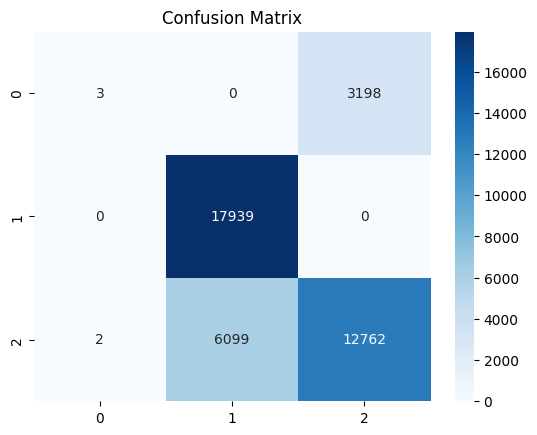

In [113]:
# Confusion Matrix
confusion_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [114]:
# Export the model to ONNX format
input_types = dict([(x, FloatTensorType([None, 1])) for x in X_train.columns.values])

try:
    model_onnx = convert_sklearn(pipeline,
                                 'rf_pipeline',
                                initial_types=list(input_types.items()))
except Exception as e:
    print(e)

with open("rf_pipeline.onnx", "wb") as f:
    f.write(model_onnx.SerializeToString())

print(f"Model exported to ONNX format and saved as random_forest_pipeline.onnx")

Model exported to ONNX format and saved as random_forest_pipeline.onnx


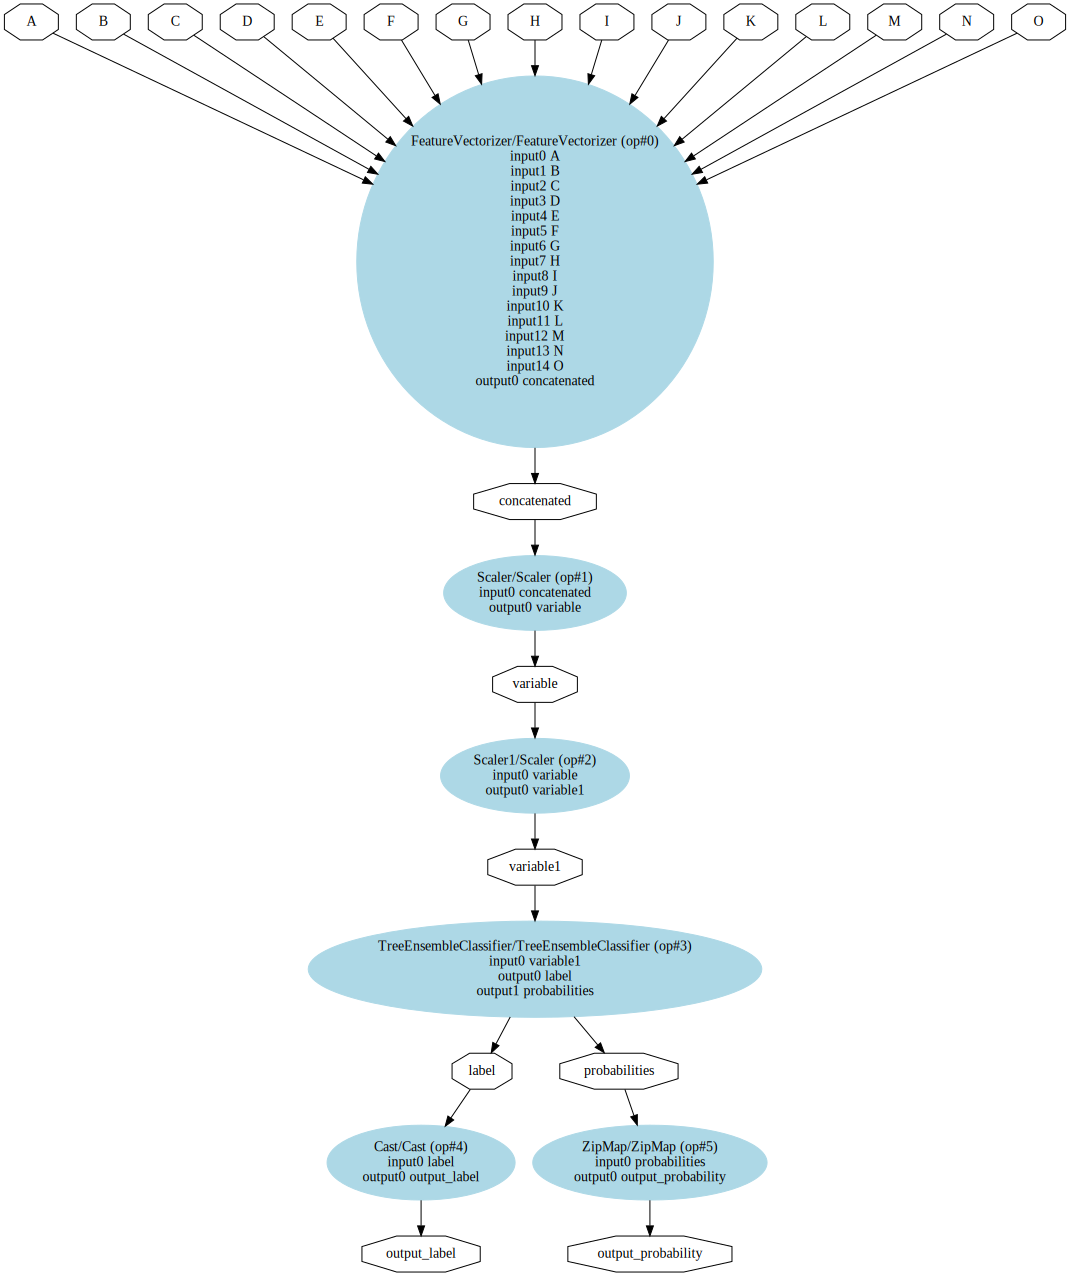

In [115]:
pydot_graph = GetPydotGraph(model_onnx.graph,
                            name=model_onnx.graph.name,
                            rankdir="TB",
                            node_producer=GetOpNodeProducer("docstring",
                                                            color="lightblue",
                                                            fillcolor="lightblue",
                                                            style="filled"))

graphviz.Source(pydot_graph.to_string())

In [120]:
import onnxruntime as rt

from onnx.tools.net_drawer import GetPydotGraph, GetOpNodeProducer

import graphviz
inputs_onnx = {k: np.array(v).astype(np.float32)[:, np.newaxis] for k, v in X_test.to_dict(orient='list').items()}

session_onnx = rt.InferenceSession("rf_pipeline.onnx")
predict_onnx = session_onnx.run(None, inputs_onnx)
print("predict", predict_onnx)

# Download the ONNX model
from google.colab import files
files.download("rf_pipeline.onnx")


predict [array([2, 3, 2, ..., 2, 3, 2], dtype=int64), [{1: 0.0, 2: 0.7709325551986694, 3: 0.22906741499900818}, {1: 0.20856907963752747, 2: 0.0, 3: 0.7914309501647949}, {1: 0.0, 2: 0.7627140879631042, 3: 0.23728595674037933}, {1: 0.0, 2: 0.7086778283119202, 3: 0.2913222908973694}, {1: 0.0, 2: 0.7536376714706421, 3: 0.24636240303516388}, {1: 0.0, 2: 0.7715376019477844, 3: 0.22846229374408722}, {1: 0.1931515336036682, 2: 0.0, 3: 0.8068485260009766}, {1: 0.20591649413108826, 2: 0.0, 3: 0.7940834164619446}, {1: 0.20704540610313416, 2: 0.0, 3: 0.7929546236991882}, {1: 0.0, 2: 0.7458224296569824, 3: 0.25417765974998474}, {1: 0.0, 2: 0.7544029951095581, 3: 0.2455969899892807}, {1: 0.20191441476345062, 2: 0.0, 3: 0.798085629940033}, {1: 0.0, 2: 0.7330303192138672, 3: 0.26696962118148804}, {1: 0.0, 2: 0.7373853921890259, 3: 0.2626144587993622}, {1: 0.18857350945472717, 2: 0.0, 3: 0.8114264607429504}, {1: 0.0, 2: 0.7454875111579895, 3: 0.2545124292373657}, {1: 0.0, 2: 0.7418273687362671, 3: 0.25

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [128]:
ort_session = ort.InferenceSession("rf_pipeline.onnx")
onnx_inputs = {ort_session.get_inputs()[0].name: X_test.astype(np.float32).values}
onnx_preds = ort_session.run(None, onnx_inputs)[0]

NameError: name 'ort' is not defined

In [125]:
# Test prediction with sample data
test_data = X_test.astype(np.float32)
predictions = session.run([output_name], {input_name: test_data})[0]

# Compare with original model predictions
original_predictions = pipeline.predict(X_test)
accuracy = (predictions == original_predictions).mean()
print(f"Prediction accuracy match: {accuracy * 100:.2f}%")

ValueError: Required inputs (['B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O']) are missing from input feed (['A']).